In [1]:
import random

STOCHASTIC_SIZE = 128

class Stochastic:
    def __init__(self, bits):
        self.bits = bits

    def __repr__(self):
        if self.bits >= 0:
            return format(self.bits, "0128b")
        else:
            return format((1 << 128) + self.bits, "0128b")

    @classmethod
    def new(cls, p):
        bits = 0
        for i in range(STOCHASTIC_SIZE):
            if random.random() < (p / 2.0 + 0.5):
                bits |= 1 << i
        return cls(bits)

    def mult(self, other):
        return Stochastic(~(self.bits ^ other.bits))

    @staticmethod
    def tanh(v):
        bits = 0
        for i in range(STOCHASTIC_SIZE):
            s = 0
            for j in range(len(v)):
                if v[j].at(i) == 1:
                    s += 1
                else:
                    s -= 1
                s = max(-7, min(7, s))
            if s > 0:
                bits |= 1 << i
        return Stochastic(bits)

    def to_f64(self):
        count = 0
        for i in range(STOCHASTIC_SIZE):
            if self.bits & (1 << i) != 0:
                count += 1
        return (count / STOCHASTIC_SIZE - 0.5) * 2.0

    def at(self, i):
        return 1 if self.bits & (1 << i) != 0 else 0
    

# a = Stochastic.new(0.5)
# b = Stochastic.new(0.5)
# c = Stochastic.tanh([a,b])
# print("a    ", a)
# print("b    ", b)
# print("a*b  ", a.mult(b))
# print("tanh ", Stochastic.tanh([a,b]))
# print("--------")
# print("a    ", a.to_f64())
# print("b    ", b.to_f64())
# print("a*b  ", a.mult(b).to_f64())
# print("tanh ", Stochastic.tanh([a,b]).to_f64())


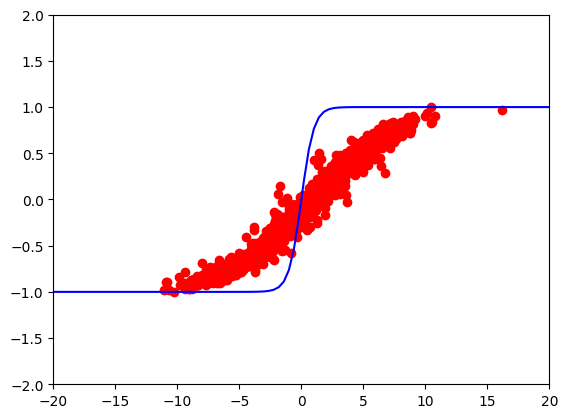

In [2]:
# Repeatedly choose n random numbers and compute Stochastic.tanh and plot the results
def test_tanh(n, k):
    import matplotlib.pyplot as plt
    import numpy as np
    import random

    # Draw a tanh line
    x = np.linspace(-20, 20, 100)
    y = np.tanh(x)
    plt.plot(x, y, color="blue")

    for i in range(n):
        v = [Stochastic.new((random.random() * 2.0 - 1)) for i in range(k)]
        c = Stochastic.tanh(v)
        plt.scatter(sum([x.to_f64() for x in v]), c.to_f64(), color="red")

    plt.xlim([-20,20])
    plt.ylim([-2,2])
    plt.show()

test_tanh(1000, 50)